# Neural Networks

In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

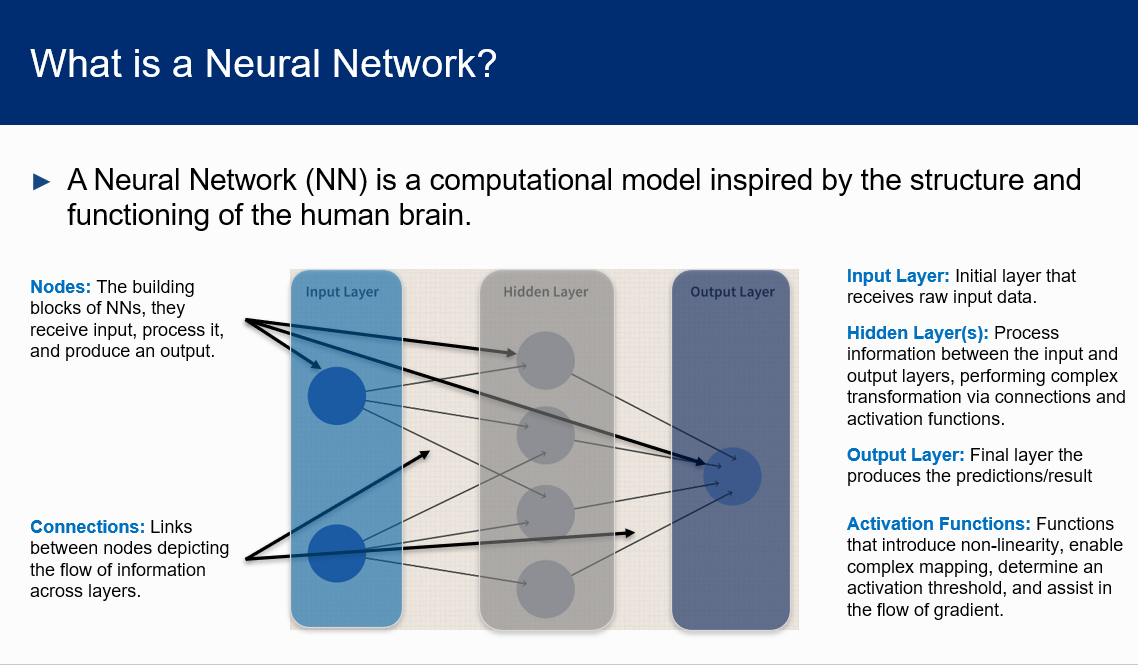

In [2]:
Image('neural_network.png')

## How does a Neural Network Learn?

1. __Initialize__ the Neural Network with random weights/biases.
2. __Forward Pass__ (Inference) data through the input, hidden, and output layers.
3. __Calculate Error__ using error or loss function
4. __Backpropagation__ involving the adjustment of the weights/biases to minimize error, utilizing optimization algorithm.
5. __Repeat__ to convergence.

## How does the individual neuron or node participate in this?

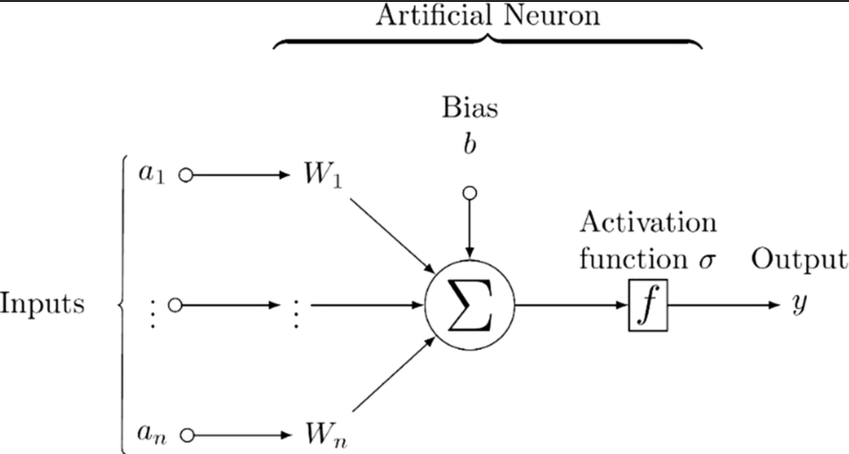

In [3]:
Image('single_artificial_neuron.png')

If we look at this Neuron there are two distinct things happening within each:
1. The summation of the inputs and the weights (addition of bias)
2. An activation function to normalize the value into a particular fashion to be given as inputs to the next layer.

## How does the summation work?

Let's take a look.

If we are going off the above diagram for one neuron then the summation is:

$$a_1 * W_1 + ... + a_n * W_n + b$$

where, $a$ is the input $W$ is the weight and $b$ is the bias. Using the $\sum$ we can then calculate an output after using an activation function, $\sigma$ to normalize the value.

## What do activation functions look like?

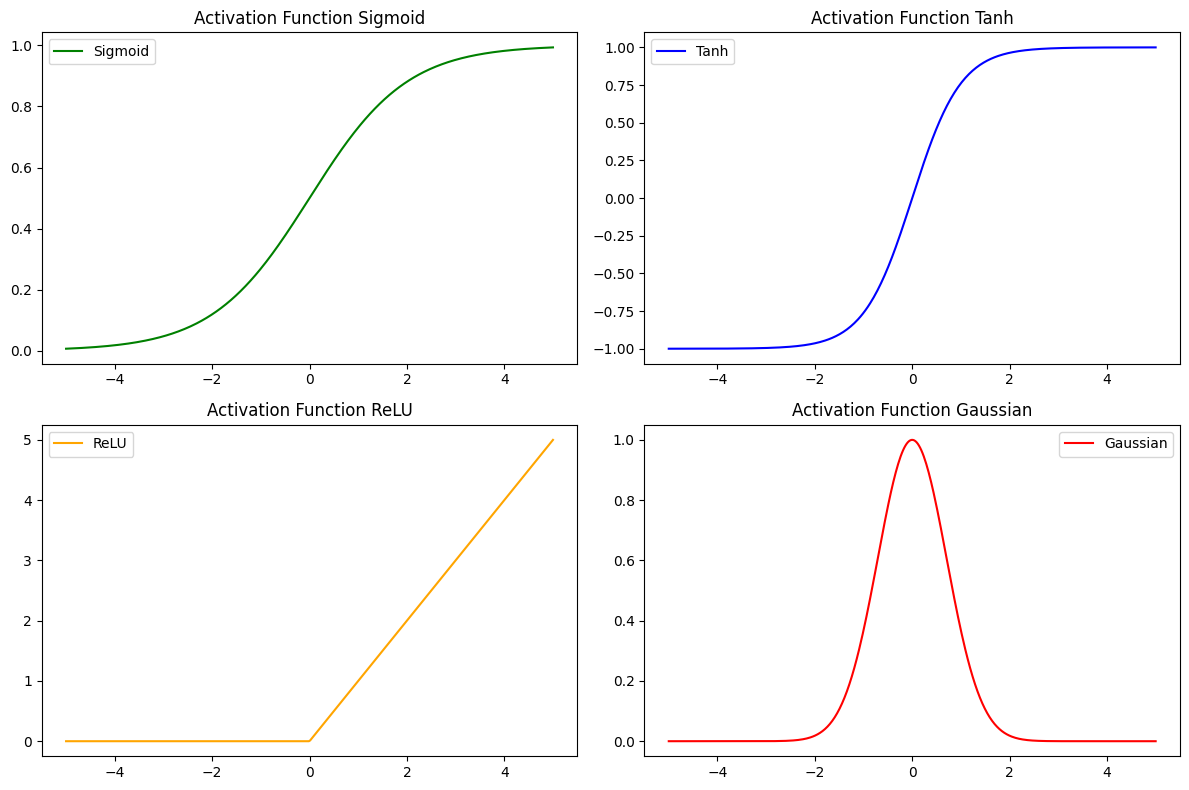

In [4]:
# Define the activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def gaussian(x):
    return np.exp(-x**2)

# Generate x values
x = np.linspace(-5, 5, 400)

# Calculate y values for each activation function
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)
y_gaussian = gaussian(x)

# Create subplots for each activation function
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, y_sigmoid, label='Sigmoid', color='green')
plt.title('Activation Function Sigmoid')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x, y_tanh, label='Tanh', color='blue')
plt.title('Activation Function Tanh')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x, y_relu, label='ReLU', color='orange')
plt.title('Activation Function ReLU')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x, y_gaussian, label='Gaussian', color='red')
plt.title('Activation Function Gaussian')
plt.legend()

plt.tight_layout()
plt.show()


Each activation function, of which there are many, have different purposes and different ranges that make them preferable for different purposes. 

Once we secure an input and output for each neuron all the way to the output layer we call that the feed forward process. We now have to calculate the error. 

## How do we compute the error?

This will be up to the design of the network but we will show two main one used for regression and classification respectively:

### Mean Squared Error

$$\frac{1}{n} \sum_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})^2$$

### Binary Cross-Entropy/Log Loss

$$- \frac{1}{n}\sum_{i=1}^{n} (y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1-\hat{y}_i))$$

Now that we have the total error of the system the point now is to distribute the total error back into the system adjusting the weights in order to minimize the loss. The weights are updated in such a way that when the next forward pass utilized the updated weights, the total error of the system is reduced by a certain margin. This happens over and over again until you reach a local minimum, which is the convergence. 

## How do we perform the backpropagation to distribute the error?

Now this is cool because we are going to use the Chain rule from Calculus and see how the output neuron (node) is affected by each of the steps before it. 

Recall:

$$\frac{dy}{dx} = \frac{dy}{du} * \frac{du}{dx}$$

So let's presume we have a network with one hidden layer with two nodes ($h_1$ and $h_2$) with inputs ($i_1$ and $i_2$) and output layers ($o_1$ and $o_2$) with weights connecting between each.

Then, 

$$\frac{\partial E_{total}}{\partial W_n} = \frac{\partial E_{total}}{\partial output_{o_n}} * \frac{\partial output_{o_n}}{\partial sum_{o_n}} * \frac{\partial sum_{o_n}}{\partial W_n} $$

So for all the weights, $W_n$ you compute the partial derivatives and use the chain rule to obtain the new $W_n$ and replace the old weights with the new weights. 

This is considered one backpropagation cycle. You then continue until local convergence. This is how you can start with randomized or uninformed weights and still converge to optimum values. 

## Activity

Using the network below, please calculate the new weights from one forward and backward pass through the network. Please use Mean Squared Error as your loss function. Use the sigmoid function as your activation function. 

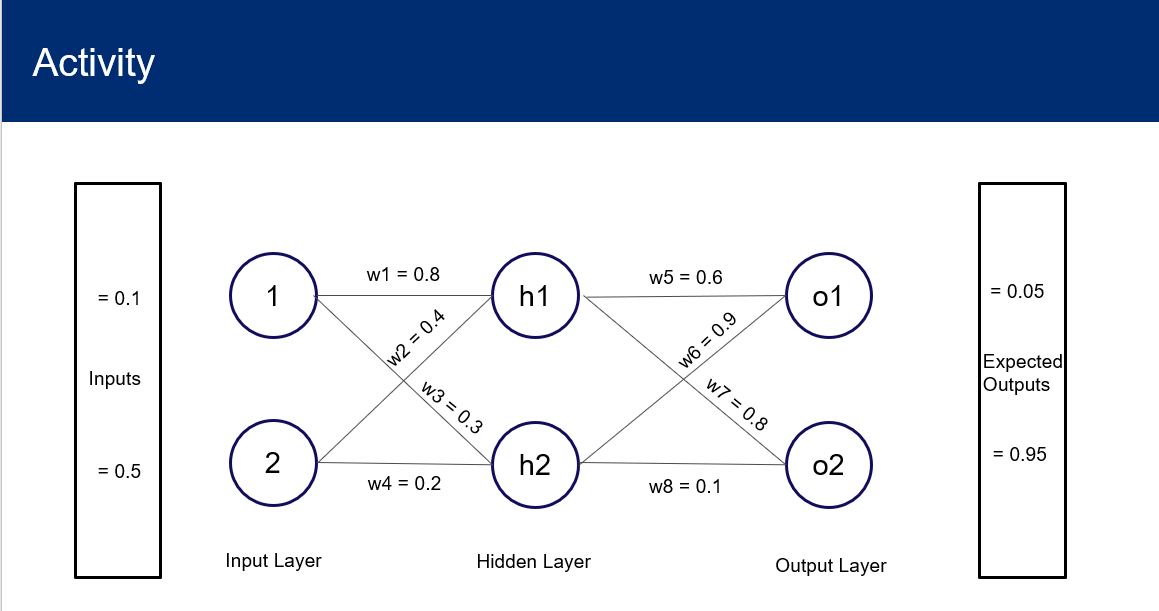

In [5]:
Image('activity_nn.png')

In [161]:
input1 = 0.1
input2 = 0.5

output1 = 0.05
output2 = 0.95

class NeuralNetwork:

    def __init__(self):
        self.w1 = 0.8
        self.w2 = 0.4
        self.w3 = 0.3
        self.w4 = 0.2
        self.w5 = 0.6
        self.w6 = 0.9
        self.w7 = 0.8
        self.w8 = 0.1
        self.original_weights = [self.w1, self.w2, self.w3, self.w4, self.w5, self.w6, self.w7, self.w8]
        self.weights = self.original_weights.copy()

    def hidden_layer(self):
        h1 = self.weights[0]*input1 + self.weights[1]*input2
        h2 = self.weights[2]*input1 + self.weights[3]*input2
        return sigmoid(h1), sigmoid(h2)

    def output_layer(self):
        h1, h2 = self.hidden_layer()
        o1 = self.weights[4]*h1 + self.weights[5]*h2
        o2 = self.weights[6]*h1 + self.weights[7]*h2
        return sigmoid(o1), sigmoid(o2)

    def mean_squared_error(self):
        o1, o2 = self.output_layer()
        return ((o1-output1)**2 + (o2-output2)**2)/2

    def backprop_output(self):
        h1, h2 = self.hidden_layer()
        o1, o2 = self.output_layer()

        d_w5 = (o1 - output1)*o1*(1-o1)*h1
        d_w6 = (o1 - output1)*o1*(1-o1)*h2
        self.weights[4] = self.weights[4] - d_w5
        self.weights[5] = self.weights[5] - d_w6

        d_w7 = (o2 - output2)*o2*(1-o2)*h1
        d_w8 = (o2 - output2)*o2*(1-o2)*h2
        self.weights[6] = self.weights[6] - d_w7
        self.weights[7] = self.weights[7] - d_w8
    
    def backprop_hidden(self):
        h1, h2 = self.hidden_layer()
        o1, o2 = self.output_layer()

        d1_w1 = (o1 - output1)*o1*(1-o1)*self.original_weights[0]
        d2_w1 = (o2 - output2)*o2*(1-o2)*self.original_weights[0]
        d3_w1 = (d1_w1 + d2_w1)*h1*(1-h1)*input1

        d1_w2 = (o1 - output1)*o1*(1-o1)*self.original_weights[1]
        d2_w2 = (o2 - output2)*o2*(1-o2)*self.original_weights[1]
        d3_w2 = (d1_w2 + d2_w2)*h1*(1-h1)*input2

        d1_w3 = (o1 - output1)*o1*(1-o1)*self.original_weights[2]
        d2_w3 = (o2 - output2)*o2*(1-o2)*self.original_weights[2]
        d3_w3 = (d1_w3 + d2_w3)*h2*(1-h2)*input1

        d1_w4 = (o1 - output1)*o1*(1-o1)*self.original_weights[3]
        d2_w4 = (o2 - output2)*o2*(1-o2)*self.original_weights[3]
        d3_w4 = (d1_w4 + d2_w4)*h2*(1-h2)*input2

        self.weights[0] = self.weights[0] - d3_w1
        self.weights[1] = self.weights[1] - d3_w2
        self.weights[2] = self.weights[2] - d3_w3
        self.weights[3] = self.weights[3] - d3_w4

NN = NeuralNetwork()
for i in range(1):
    NN.backprop_output()
    NN.backprop_hidden()

error = NN.mean_squared_error()
print(f"Neural Network Error: {error}")
print()
print("Original Weights:")
print(NN.original_weights)
print()
print("Weights After one Forward and Backwards Propagation:")
print(NN.weights)

Neural Network Error: 0.2457353747725628

Original Weights:
[0.8, 0.4, 0.3, 0.2, 0.6, 0.9, 0.8, 0.1]

Weights After one Forward and Backwards Propogation:
[0.7987405963492469, 0.396851490873117, 0.2995204353948782, 0.1984014513162608, 0.5221168889938012, 0.8271890566435974, 0.8434652861362355, 0.14063459260870287]
